# Fraud Detection Notebook using Machine Learning

In [1]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 31.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=5fa6c01bca62b1e1e6c323143ad7358fa0f413bb2dfe920f0343c677cc9ae4e7
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_e

## install Light Gradient Boosted Machine. It is based on decision tree algorithms and used for ranking, classification and other machine learning tasks

In [2]:
!pip install lightgbm

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipaddress
import pandas_profiling as pp
%matplotlib inline
from sklearn import preprocessing
plt.rc("font", size=14)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMClassifier
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

<ipython-input-3-3dec6031fd69>:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [4]:
import types
import pandas as pd

url = 'https://raw.githubusercontent.com/IBM/predict-fraud-using-auto-ai/master/data/fraud_dataset.csv'
df = pd.read_csv(url)

print(df.head())
print(df.shape)

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          1              0             5849   
1       1        1           1          1              1             4583   
2       1        1           0          1              1             3000   
3       1        1           0          0              1             2583   
4       1        0           0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Term  Credit_History_Available  \
0                  0         146        360                         1   
1               1508         128        360                         1   
2                  0          66        360                         1   
3               2358         120        360                         1   
4                  0         141        360                         1   

   Housing  Locality  Fraud_Risk  
0        1         1           0  
1        1         3        

In [5]:
count_fraud = len(df[df['Fraud_Risk']==0])
count_non_fraud = len(df[df['Fraud_Risk']==1])
pct_of_non_fraud = count_non_fraud/(count_non_fraud +count_fraud)
print("percentage of non Fraud Risk is", round(pct_of_non_fraud*100,2))
pct_of_fraud = count_fraud/(count_non_fraud +count_fraud)
print("percentage of Fraud Risk", round(pct_of_fraud*100,2))

percentage of non Fraud Risk is 57.68
percentage of Fraud Risk 42.32


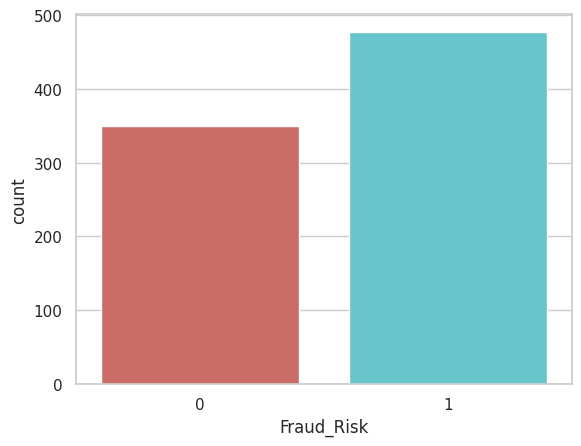

In [6]:
sns.countplot(x='Fraud_Risk',data=df, palette='hls')
plt.show()

In [7]:
df.groupby('Fraud_Risk').mean()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality
Fraud_Risk,,,,,,,,,,,,
0,0.574286,0.000000,0.308571,0.808571,0.177143,4779.974286,1092.642857,125.611429,346.685714,0.974286,0.700000,2.005714
1,0.851153,0.834382,0.905660,0.777778,0.865828,5530.683438,1774.714885,152.104822,331.849057,0.819706,0.620545,1.958071


In [8]:
df.corr(method ='pearson')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
Gender,1.000000,0.355319,0.121868,-0.080883,0.256583,0.010382,0.116468,0.089613,-0.074194,-0.019499,-0.006226,-0.002798,0.309570
Married,0.355319,1.000000,0.375512,-0.034168,0.829158,0.071710,0.106108,0.175254,-0.108588,-0.085615,-0.093419,-0.019892,0.825064
Dependents,0.121868,0.375512,1.000000,-0.025549,0.349978,0.130331,0.026961,0.182559,-0.050031,-0.085019,-0.022433,-0.012152,0.315421
Education,-0.080883,-0.034168,-0.025549,1.000000,-0.027868,0.127969,0.050707,0.154714,0.109241,0.057124,0.001073,-0.103206,-0.037406
Self_Employed,0.256583,0.829158,0.349978,-0.027868,1.000000,0.138274,0.078241,0.229533,-0.104434,-0.049356,-0.106595,-0.049677,0.688170
ApplicantIncome,0.010382,0.071710,0.130331,0.127969,0.138274,1.000000,-0.120363,0.564923,-0.004199,-0.022038,-0.049480,-0.018499,0.066347
CoapplicantIncome,0.116468,0.106108,0.026961,0.050707,0.078241,-0.120363,1.000000,0.165940,-0.054756,-0.035843,-0.018713,0.003190,0.120304
LoanAmount,0.089613,0.175254,0.182559,0.154714,0.229533,0.564923,0.165940,1.000000,0.073583,-0.024920,-0.084477,0.022021,0.164087
Loan_Term,-0.074194,-0.108588,-0.050031,0.109241,-0.104434,-0.004199,-0.054756,0.073583,1.000000,0.076045,0.026219,0.084809,-0.097339
Credit_History_Available,-0.019499,-0.085615,-0.085019,0.057124,-0.049356,-0.022038,-0.035843,-0.024920,0.076045,1.000000,0.017112,-0.005251,-0.239512


In [9]:
## Select input and target variables

In [10]:
X = df[df.columns[0:12]]
y = df[df.columns[12:]]

In [11]:
df.dtypes

Gender                      int64
Married                     int64
Dependents                  int64
Education                   int64
Self_Employed               int64
ApplicantIncome             int64
CoapplicantIncome           int64
LoanAmount                  int64
Loan_Term                   int64
Credit_History_Available    int64
Housing                     int64
Locality                    int64
Fraud_Risk                  int64
dtype: object

In [12]:
df.isna()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,False,False,False,False,False,False,False,False,False,False,False,False,False
823,False,False,False,False,False,False,False,False,False,False,False,False,False
824,False,False,False,False,False,False,False,False,False,False,False,False,False
825,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Splitting the data with 70% as training set and 30% as test set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
print("Train_x Shape :: ", X_train.shape)
print("Train_y Shape :: ", y_train.shape)
print("Test_x Shape :: ", X_test.shape)
print("Test_y Shape :: ", y_test.shape)

Train_x Shape ::  (578, 12)
Train_y Shape ::  (578, 1)
Test_x Shape ::  (249, 12)
Test_y Shape ::  (249, 1)


In [16]:
d_train = lgb.Dataset(X_train, label=y_train)

In [17]:
def LGBM_classifier(features, target):
    """
    To train the LGBM classifier with features and target data
    :param features:
    :param target:
    :return: trained LGBM classifier
    """
    model = LGBMClassifier(metric='binary_logloss', objective='binary')
    model.fit(features, target)
    return model

start = time.time()
trained_model = LGBM_classifier(X_train, y_train.values.ravel())
print("> Completion Time : ", time.time() - start)
print("Trained LGBM model :: ", trained_model)
predictions = trained_model.predict(X_test)

[LightGBM] [Info] Number of positive: 338, number of negative: 240
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 578, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.584775 -> initscore=0.342407
[LightGBM] [Info] Start training from score 0.342407
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

## Select input and target variables

In [18]:
print("Train Accuracy :: ", accuracy_score(y_train, trained_model.predict(X_train)))
print("LGBM Model Test Accuracy is :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  1.0
LGBM Model Test Accuracy is ::  0.927710843373494


In [19]:
print(" Confusion matrix ", confusion_matrix(y_test, predictions))

 Confusion matrix  [[108   2]
 [ 16 123]]


<Axes: >

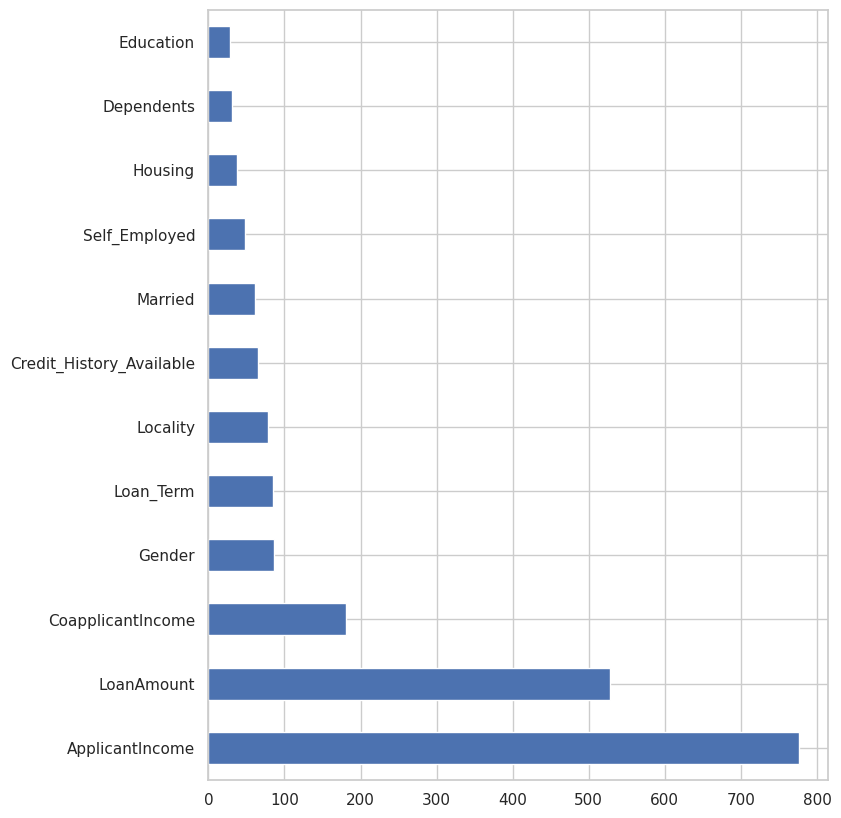

In [20]:
feat_imp = pd.Series(trained_model.feature_importances_, index=X.columns)
feat_imp.nlargest(12).plot(kind='barh', figsize=(8,10))

## SHAP (SHapley Additive exPlanations) is a unified approach to explain the output of any machine learning model.

In [21]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.3 MB/s eta 0:00:00


In [22]:
import shap
shap.initjs()

In [23]:
shap_values = shap.TreeExplainer(trained_model.booster_).shap_values(X_train)

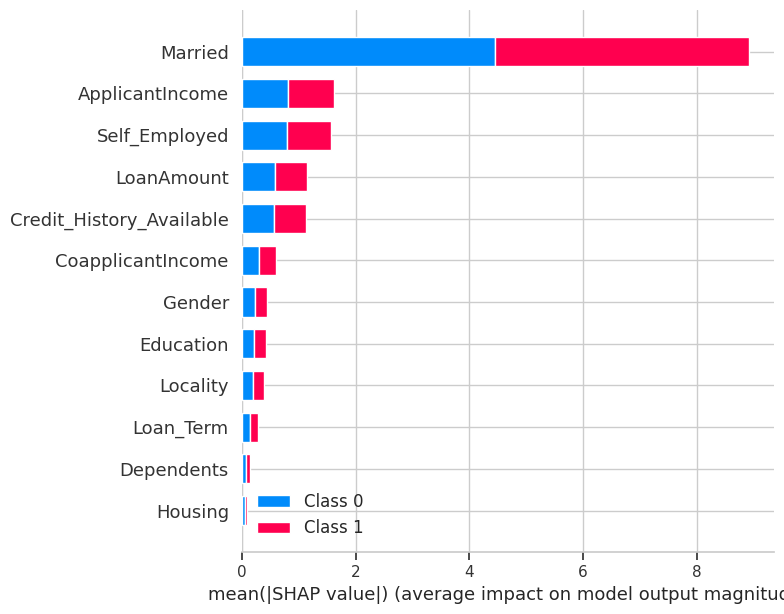

In [24]:
shap.summary_plot(shap_values, X_train)

### In this notebook, we have done exploratory data analysis, feature importance, model building & interpreting the model attributes for improving the accuracy. This is to demonstrate some of the mandatory steps which are involved in building predictive models which are done manually. These steps can take days to complete. All these steps are automated in AutoAI feature in Watson Studio where we can create and deploy machine learning models in minutes.